# Özellik Eşleme 
- Görünüt işlemede notka özelliği eşleşmesi, karmaşık bir sahnede istenilen hedefi tespit etmek için etkili bir yöntemdir.
- Bu yöntem, birden çok nesne içinden tek nesneleri algılar
   
- Brute-Force eşleştiricisi, bir görüntüdeki bir özelliğin tanımlayıcısını başka bir görüntünün diğer tüm özellikleriyle eşleştirir ve mesafeye göre eşleşmeyi döndürür.
  - Tüm özelliklerle eşleşmeyi kontrol ettiği için yavaştır

- Ölçek değişmez özellik dönüşümü, anahtar noktaları ilk olarak bir dizi referans görüntüden çıkarılır ve saklanır.
   - Yeni görüntüdeki her bir özelliği bu saklanan veri ile ayrı ayrı karşılaştırarak ve öznitelik vektörlerinin mesafelerini Öklid mesafesine dayalı olarak aday eşleştirme özelliklerini bularak yeni bir görüntüde nesne aranır.

In [11]:
import cv2
import matplotlib.pyplot as plt

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 511.5, 125.5, -0.5),
 Text(0.5, 1.0, 'Aranacak Nesne'))

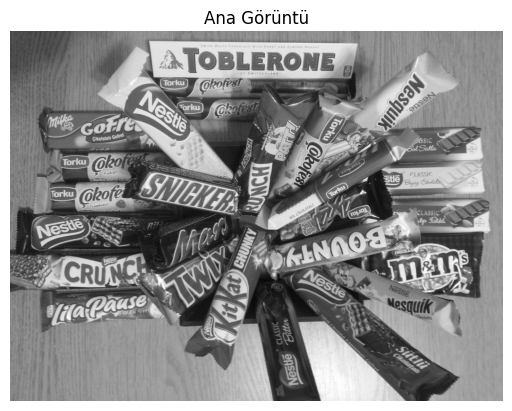

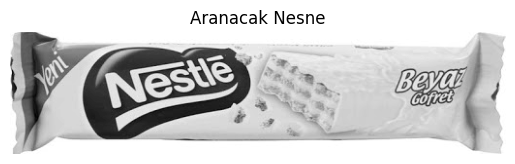

In [12]:
# Ana görüntüyü içe aktar 
chos = cv2.imread("chocolates.jpg", 0)
plt.figure(), plt.imshow(chos, cmap="gray"), plt.axis("off"), plt.title("Ana Görüntü")

# Aranacak nesne görüntüsünü içe aktar
cho = cv2.imread("nestle.jpg", 0)
plt.figure(), plt.imshow(cho, cmap="gray"), plt.axis("off"), plt.title("Aranacak Nesne")

In [13]:
# ORB özellik çıkarıcı oluştur
# Aradığımız nesneye ait özellikleri çıkarmak için
orb = cv2.ORB_create()

# Anahtar nokta tespiti 
kp1, des1 = orb.detectAndCompute(cho, None)
kp2, des2 = orb.detectAndCompute(chos, None)

(<matplotlib.image.AxesImage at 0x7fdd74547400>,
 (-0.5, 1521.5, 757.5, -0.5),
 Text(0.5, 1.0, 'ORB ile Eşleşen Noktalar'))

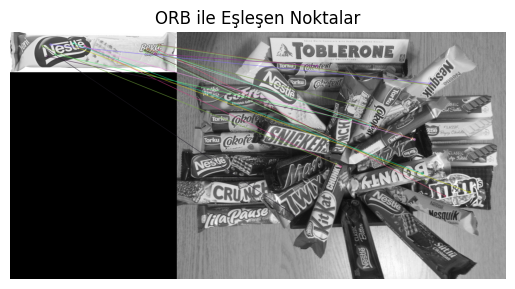

In [14]:
# Brute Force Matcher oluştur
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
# Noktaları eşleştir
matches = bf.match(des1, des2)

# Eşleşen noktaları sırala
matches = sorted(matches, key=lambda x: x.distance)

# Eşleşen noktaları çiz
plt.figure()
img_match = cv2.drawMatches(cho, kp1, chos, kp2, matches[:20], None, flags=2)
plt.imshow(img_match), plt.axis("off"), plt.title("ORB ile Eşleşen Noktalar")

In [15]:
!pip install opencv-contrib-python --user # SIFT için gerekli

(<matplotlib.image.AxesImage at 0x7fdd74584e50>,
 (-0.5, 1521.5, 757.5, -0.5),
 Text(0.5, 1.0, 'SIFT ile Eşleşen Noktalar'))

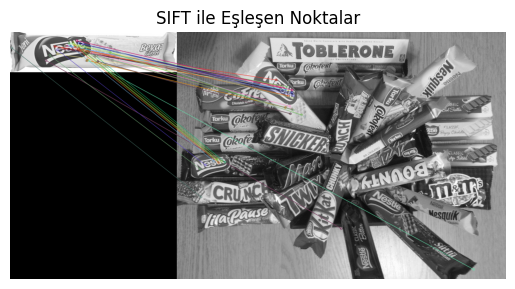

In [17]:
# SIFT özellik çıkarıcı oluştur
sift = cv2.xfeatures2d.SIFT_create()

# Brute Force Matcher oluştur
bf = cv2.BFMatcher()

# Anahtar nokta tespiti SIFT ile
kp1, des1 = sift.detectAndCompute(cho, None)
kp2, des2 = sift.detectAndCompute(chos, None)

# Eşleşen noktaları k-NN algoritması ile bul
matches = bf.knnMatch(des1, des2, k=2)

guzelEslesme = []

# Eşleşen noktaların %75'inden daha iyi olanları seç
for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        guzelEslesme.append([match1])

# Eşleşen noktaları çiz
plt.figure()
sift_matches = cv2.drawMatchesKnn(cho, kp1, chos, kp2 , guzelEslesme, None, flags=2)
plt.imshow(sift_matches), plt.axis("off"), plt.title("SIFT ile Eşleşen Noktalar")